# MPC-based EMS

In [1]:
%load_ext autoreload
%autoreload 2  
%pwd
%cd /home/sg/hessems

/home/sg/Seafile/ifes-hess-control/hessems


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import sawtooth

from hessems.mpc import mpc, MPCModel

%matplotlib widget

## Std Configuration and time series definition

In [3]:
para = {
    # Free parameters
    "w1": 1e5,
    "w2": 0.995,
    "w3": 0.005,
    "ref": 0.1,
    # Fixed parameters
    "pbase_max": 2,
    "pbase_min": -2,
    "ppeak_max": 2,
    "ppeak_min": -2,
    "ebase_max": 2,
    "epeak_max": 0.2,
    "tau_base": 0,
    "tau_peak": 0,
    "eta_base": 1,
    "eta_peak": 1,
}

ebinit = 2
epinit = 0.2

p1 = -np.array([4, 0, 4, 0, 2, 0, 2, 0, 2, 1, 2, 1])
p2 = -np.array([4, -2, 2, -1, -1, -1, -1, 4, 1, 2, 3, 2])
dt = np.full_like(p1, 0.1, dtype=np.double)

### Plot both time series in std configuration

Here, the weights `w2` and `w3` for peak energy reference tracking and base
utilization are both activated.

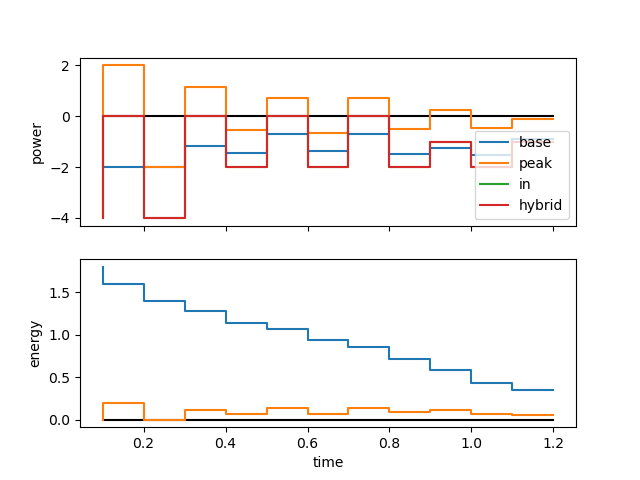

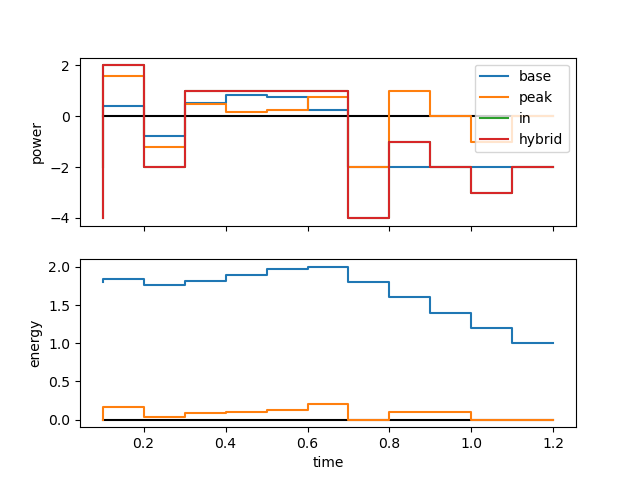

In [4]:
model = MPCModel(p1, dt, ebinit, epinit, para)
model.build()
model.solve()
model.plot()

model2 = MPCModel(p2, dt, ebinit, epinit, para)
model2.build()
model2.solve()
model2.plot()

### Ignore Reference Tracking
Weights are set in a way that base utilization is minimized but reference
tracking for peak is deactivated (only limited by hard constraints)

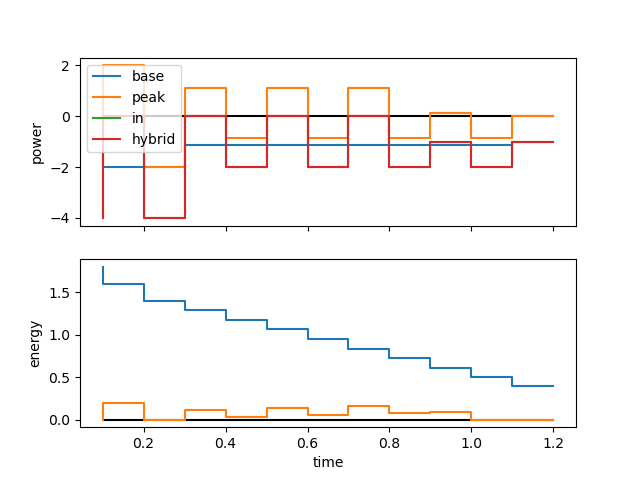

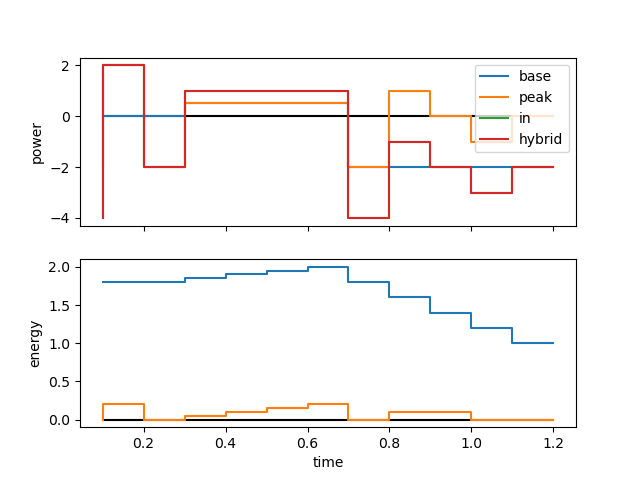

In [5]:
# Caution:
# overwriting variables of previously defined cells - execution order matters 

para['w2'] = 0
para['w3'] = 1

model = MPCModel(p1, dt, ebinit, epinit, para)
model.build()
model.solve()
model.plot()

model2 = MPCModel(p2, dt, ebinit, epinit, para)
model2.build()
model2.solve()
model2.plot()

### Ignore base storage utilization
Only reference tracking is put into objective, base storage tracking is disabled

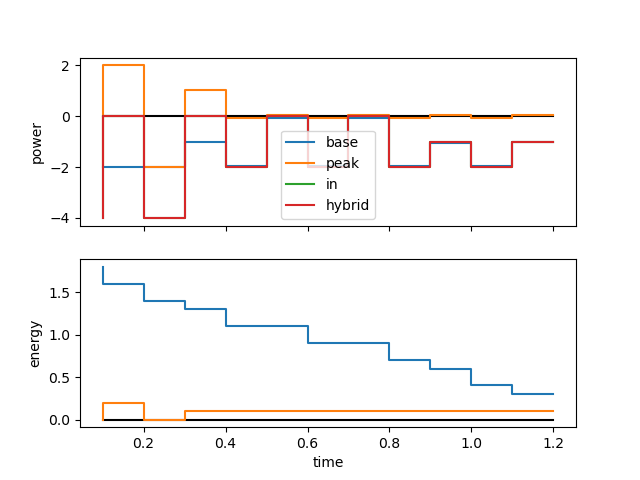

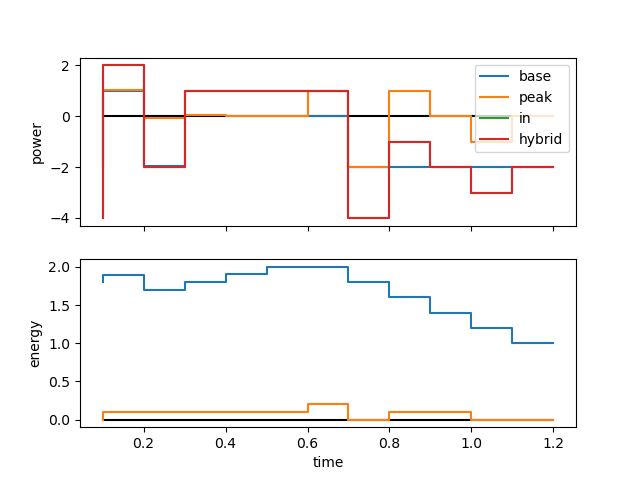

In [6]:
# Caution:
# overwriting variables of previously defined cells - execution order matters 

para['w2'] = 1
para['w3'] = 0

model = MPCModel(p1, dt, ebinit, epinit, para)
model.build()
model.solve()
model.plot()

model2 = MPCModel(p2, dt, ebinit, epinit, para)
model2.build()
model2.solve()
model2.plot()

You can prominently see the differences in the energy content over time of the
peak storage (orange) of the first time series (upper figure).

- In the first case (weighting both objectives), there are slight deviations of 
  epeak from reference, but it is tracked well.
- In the second case (weighting only) base utilization, peak is utilized
  whenever possible and is empty at the end of the simulation.
- In the last case, only weighting reference tracking, peak energy is at
  reference most of the time and base is utilized whenever possible.

### Test and time different prediction horizons

In [7]:
lengths = [1, 4, 16, 64, 128, 256]
p_concat = np.concatenate([p1]*30)
dt_concat = np.concatenate([dt]*30)
p_timeit = [p_concat[:l] for l in lengths]
dt_timeit = [dt_concat[:l] for l in lengths]

ebinit = 200
para['ebase_max'] = 200
para['w2'] = 0.995
para['w3'] = 0.005

for l, p, d in zip(lengths, p_timeit, dt_timeit):
    print(f'Needed time for length = {l}')
    %timeit mpc(p, d, ebinit, epinit, para)

Needed time for length = 1


30.8 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Needed time for length = 4
30.7 ms ± 2.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Needed time for length = 16
50 ms ± 8.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Needed time for length = 64
98.6 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Needed time for length = 128
170 ms ± 5.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Needed time for length = 256
296 ms ± 9.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Do again for other objective weights (base util deactivated)

In [8]:
para['w2'] = 1
para['w3'] = 0

for l, p, d in zip(lengths, p_timeit, dt_timeit):
    print(f'Needed time for length = {l}')
    %timeit mpc(p, d, ebinit, epinit, para)

Needed time for length = 1


32 ms ± 2.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Needed time for length = 4
36.8 ms ± 2.63 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Needed time for length = 16
53.1 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Needed time for length = 64
104 ms ± 14.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Needed time for length = 128
231 ms ± 44.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Needed time for length = 256
389 ms ± 53.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
